___

# Scraping and Exploratory Data Analysis of Hotel Details using Selenium from booking.com

___

### Problem Statement

In this notebook, we will attempt to extract data from Booking.com India. We will try and retrieve data from all the hotels in Goa, India. To do this, we will first require to create a scraper to extract this data. This is done through selenium and python.

Once we create the scraper and we are able to extract the data, we will perform very simple Exploratory Data Analysis to gain a few insights about our data.

___

### 1. Importing libraries

In [100]:
from selenium import webdriver
import time
import numpy as np
import pandas as pd
#from PIL import Image
import PIL
import io
from selenium.common.exceptions import ElementClickInterceptedException
import urllib

In [98]:
from bs4 import BeautifulSoup
import re

In [19]:
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline

- We have imported libraries such as numpy and pandas to be able to store the data we extract in the form of a DataFrame and be able to manipulate the data easily.
- The time library is used just to provide delay to our scraper to give the browser time to load web pages.
- matplotlib and seaborn are used for simple visualizations.
- Lastly, webdriver is imported from selenium in order for us to establish a connection to the website.

___

### 2. Creating the web-scraper

In [302]:
print("Web Scarping starting") # Web scraping started

hotel_dataframe = pd.DataFrame(columns=['Name','Location','Rating','Star Rating','Reviews'])
# Removed Description feature

chromedriver_path = r"C:\Users\user\Downloads\chromedriver.exe" # Location of chrome driver
driver_obj = webdriver.Chrome(chromedriver_path)

hotels_website_url = "https://www.booking.com/index.en-gb.html?label=gen173nr-1DCAEoggI46AdIM1gEaGyIAQGYAQm4ARfIAQzYAQPoAQGIAgGoAgO4AvOCpvwFwAIB0gIkNmI4OGE3NzktM2MzNC00MWI5LWFkYjctNzVjZDI2NmFiNTI52AIE4AIB;sid=0a76ca5aa0c5e53e9d511e56778f357c;keep_landing=1&sb_price_type=total&" # URL of the destination website
driver_obj.get(hotels_website_url)
driver_obj.maximize_window() # Maximizes the browser window

destination_location_element = driver_obj.find_element_by_id("ss") # Destination web element
calendar_element = driver_obj.find_element_by_xpath('//*[@id="frm"]/div[1]/div[2]')
get_calendar_element = driver_obj.find_element_by_xpath('//*[@id="frm"]/div[1]/div[2]/div[2]/div/div/div[3]/div[1]/table')

search_button_element = driver_obj.find_element_by_xpath('//*[@id="frm"]/div[1]/div[4]/div[2]/button') # Search button web element

print("printing the button element")



destination_location_element.send_keys('Goa, India') # Sending the input of the destination web element

print('Entering the destination')
search_button_element.click() # Clicking the search button element
time.sleep(5)
check_in_date = '2020-10-23' # check in date
check_out_date = '2020-10-25' # check out date

selected_flag = False
while selected_flag == False:
    #print('LOOP STARTED')
    calendar_element= driver_obj.find_element_by_xpath('//*[@id="frm"]/div[3]/div/div[2]/div/div/div[3]')
    calendar_list = calendar_element.find_elements_by_class_name("bui-calendar__wrapper")
    for month in calendar_list:
        if selected_flag == False:
            month_1 = month.find_element_by_class_name("bui-calendar__dates")
            month_1_tbody = month_1.find_element_by_css_selector('tbody')        
            month_value_row = month_1_tbody.find_elements_by_tag_name("tr")
            for tr in month_value_row:
                if selected_flag == False:
                    td_element = tr.find_elements_by_tag_name("td")
                    print(len(td_element))
                    number_of_days_checked = 0
                    
                    for td in td_element:
                        if selected_flag == False:
                            number_of_days_checked +=1
                            element_date = td.get_attribute('data-date')
                            #print('CHECK IN DATE',check_in_date)
                            if element_date == check_in_date:
                                #print('TD ATTRIBUTE VALUE',td.get_attribute('data-date'))
                                td.click()
                                #print('BUTTON HAS BEEN CLICKED')
                                selected_flag = True
                                break

time.sleep(5)
check_out_element = driver_obj.find_element_by_xpath('//*[@id="frm"]/div[3]/div/div[1]/div[2]/div/div/div')
check_out_element.click()

selected_flag = False

print('THE CHECK IN IS DONE')

while selected_flag == False:
    #print('CHECK OUT ENTERED')
    calendar_element= driver_obj.find_element_by_xpath('//*[@id="frm"]/div[3]/div/div[2]/div/div/div[3]')
    calendar_list = calendar_element.find_elements_by_class_name("bui-calendar__wrapper")
    for month in calendar_list:
        if selected_flag == False:
            month_1 = month.find_element_by_class_name("bui-calendar__dates")
            month_1_tbody = month_1.find_element_by_css_selector('tbody')        
            month_value_row = month_1_tbody.find_elements_by_tag_name("tr")
            for tr in month_value_row:
                if selected_flag == False:
                    td_element = tr.find_elements_by_tag_name("td")
                    print(len(td_element))
                    #number_of_days_checked = 0
                    for td in td_element:
                        if selected_flag == False:
                           #number_of_days_checked +=1
                            element_date = td.get_attribute('data-date')
                            #print('CHECK OUT DATE',check_out_date)
                            #print('TD ATTRIBUTE VALUE',element_date)
                            if element_date == check_out_date:
                                #print('TD ATTRIBUTE VALUE',td.get_attribute('data-date'))
                                td.click()
                                #print('BUTTON HAS BEEN CLICKED')
                                selected_flag = True
                                break

print('Clicking the search button')
search_button_with_dates = driver_obj.find_element_by_xpath('//*[@id="frm"]/div[5]/div[2]/button')
search_button_with_dates.click()
time.sleep(5) ##

results = int((driver_obj.find_element_by_xpath('//*[@id="search_results_table"]/div[4]/div').text)[11:]) # Total number of hotels that are displayed on each page
#hotels = driver_obj.find_elements_by_id('search_results_table') # List of the instances of the page
#### removed because of stale element ## hotel = driver_obj.find_elements_by_xpath('//*[@id="hotellist_inner"]')[0]
pages = 10 # Total number of pages that will be scraped (2-40)
time.sleep(10) # Waits 10 seconds before proceeding for the browser to load
#print('HOTELS LENGTHHHHH',len(hotels))
for j in range(0,pages-1):
    hotel = driver_obj.find_elements_by_xpath('//*[@id="hotellist_inner"]')[0]
    k = 1
    #for hotel in hotels:
    for i in range(1,results):
        try:
        #print(i)//*[@id="hotellist_inner"]/div[4] //*[@id="hotellist_inner"]/div[7]
            #print('VALUE OF K BEFORE', k)
            hotel_id = hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(k) +']')
            #print('VALUE OF K ', k)
            price_of_hotel = hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div[1]/div[2]/div[3]/div/div/div/div/div[2]/div[1]')
            final_price = price_of_hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(k) +']/div[2]/div[3]/div/div/div/div/div[2]/div[1]/div[2]/div/div').text
            #print('PRICE OF HOTEL',final_price)
            id_of_hotel = hotel_id.get_attribute("data-hotelid")
            #print('HOTEL IDDD',id_of_hotel)
            availability_button = hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(i) +']/div[2]/div[1]/div[1]/div[1]/h3/a')
            hotel_url = availability_button.get_attribute('href')
            img = hotel.find_element_by_xpath('//*[@id="hotel_'+ str(id_of_hotel) +'"]/a/img')
            src = img.get_attribute('src')
            urllib.request.urlretrieve(src, 'hotel'+ str(j) + str(i)+'.png')
            image_hotel = PIL.Image.open('hotel'+ str(j) + str(i)+'.png')
            reviews = hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(i) +']/div[2]/div[1]/div[2]/div/div[1]/a[1]/div/div[2]/div[2]').text # Fetches the number of reviews
            reviews = reviews.split(' ')[0] # Extracts just the number of reviews
            hotel_rating = hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(i) +']/div[2]/div[1]/div[1]/div[1]/span/span[1]/span') # Retrieves the element with hotel rating
            aria_label = hotel_rating.find_element_by_css_selector('span').get_attribute("aria-label") # extracts the value in the aria-label attribute (Rating)
            loc_formatted = (hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(i) +']/div[2]/div[1]/div[1]/div[2]/a').text)[:-12] # Returns the location of the hotel
            new_row = {'Name': hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(i) +']/div[2]/div[1]/div[1]/div[1]/h3/a/span[1]').text,
                       # Removed description as it is not on the page
                       #'Description':hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(i) +']/div[2]/div[1]/div[1]/div[3]').text,
                       'Location':loc_formatted,
                       'Rating':hotel.find_element_by_xpath('//*[@id="hotellist_inner"]/div['+ str(i) +']/div[2]/div[1]/div[2]/div/div[1]/a[1]/div/div[1]').text,
                       'Star Rating': aria_label[0],
                       'Reviews': reviews,
                       'Image':image_hotel,
                       'price':final_price
                      } # Create a row for the DataFrame

            hotel_dataframe = hotel_dataframe.append(new_row, ignore_index=True) # insert the row into the DataFrame
        except Exception as ex:
            print('exception has occured', ex) # Print out the error message if an exception occcurs
        k+=1
        
    next_button_element = driver_obj.find_element_by_xpath('//*[@id="search_results_table"]/div[4]/nav/ul/li[3]/a') # Next page button element
    next_button_element.click() # Click on the next button to navigate to the next page
    time.sleep(10) # Wait for 5 seconds for the next page to load

driver_obj.close() # Close the webdriver object and close the browser

print("finished scraping")

Web Scarping starting
printing the button element
Entering the destination
7
7
7
7
THE CHECK IN IS DONE
7
7
7
7
7
Clicking the search button
exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[3]/div[2]/div[3]/div/div/div/div/div[2]/div[1]/div[2]/div/div"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[7]/div[2]/div[3]/div/div/div/div/div[2]/div[1]/div[2]/div/div"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[9]/div[2]/div[1]/div[1]/div[1]/span/span[1]/span"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[15]/div[2]/div[3]/div/d

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[13]/div[2]/div[3]/div/div/div/div/div[2]/div[1]/div[2]/div/div"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[14]/div[2]/div[1]/div[1]/div[1]/span/span[1]/span"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[15]/div[2]/div[3]/div/div/div/div/div[2]/div[1]/div[2]/div/div"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[17]/div[2]/div[1]/div[1]/div[1]/span/span[1]/span"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate eleme

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[9]/div[2]/div[1]/div[1]/div[1]/span/span[1]/span"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[10]/div[2]/div[3]/div/div/div/div/div[2]/div[1]/div[2]/div/div"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[12]/div[2]/div[3]/div/div/div/div/div[2]/div[1]/div[2]/div/div"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[13]/div[2]/div[1]/div[1]/div[1]/span/span[1]/span"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate elemen

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[1]/div[2]/div[3]/div/div/div/div/div[2]/div[1]"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[1]/div[2]/div[3]/div/div/div/div/div[2]/div[1]"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[1]/div[2]/div[3]/div/div/div/div/div[2]/div[1]"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="hotellist_inner"]/div[1]/div[2]/div[3]/div/div/div/div/div[2]/div[1]"}
  (Session info: chrome=86.0.4240.75)

exception has occured Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[

finished scraping


In [303]:
hotel_dataframe.shape

(61, 7)

In [304]:
hotel_dataframe.tail(10)

,Name,Location,Rating,Star Rating,Reviews,Image,price
51,Casa Baga,"Baga Beach, Baga",6.9,3,35,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 7,480"
52,Alcove Resort,"Vagator Beach, Vagator",8.1,3,51,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 8,000"
53,Aaria Residency,Arambol,9.1,2,158,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 3,010"
54,Radisson Goa Candolim,Candolim,7.9,4,233,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 11,011"
55,"Mariaariose - ""Melody of the Sea""",Bogmalo,7.9,3,419,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 4,284"
56,Pride Sun Village Resort & Spa,Baga,6.9,4,38,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 4,605"
57,Golden Tulip Goa,Candolim,7.6,4,323,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 7,500"
58,Karma Royal Haathi Mahal,"Cavelossim Beach, Cavelossim",8.4,4,53,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 14,000"
59,De Baga Deck Comforts,Calangute,8.3,3,42,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 5,998"
60,Chalet Saffron Goa,"Benaulim Beach, Benaulim",9.1,4,55,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 4,424"


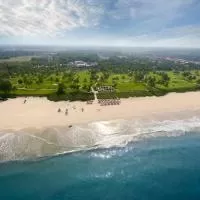

In [154]:
hotel_dataframe['Image'][0]

- Our scraper has now extracted the data from the booking.com site and we have saved it to a DataFrame.
- The next step will be to look at this data and try and explore it a bit.

___

### 3. Analyzing the DataFrame

In [305]:
hotel_dataframe.tail(10)

,Name,Location,Rating,Star Rating,Reviews,Image,price
51,Casa Baga,"Baga Beach, Baga",6.9,3,35,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 7,480"
52,Alcove Resort,"Vagator Beach, Vagator",8.1,3,51,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 8,000"
53,Aaria Residency,Arambol,9.1,2,158,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 3,010"
54,Radisson Goa Candolim,Candolim,7.9,4,233,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 11,011"
55,"Mariaariose - ""Melody of the Sea""",Bogmalo,7.9,3,419,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 4,284"
56,Pride Sun Village Resort & Spa,Baga,6.9,4,38,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 4,605"
57,Golden Tulip Goa,Candolim,7.6,4,323,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 7,500"
58,Karma Royal Haathi Mahal,"Cavelossim Beach, Cavelossim",8.4,4,53,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 14,000"
59,De Baga Deck Comforts,Calangute,8.3,3,42,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 5,998"
60,Chalet Saffron Goa,"Benaulim Beach, Benaulim",9.1,4,55,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"₹ 4,424"


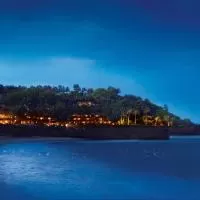

In [306]:
hotel_dataframe['Image'][0]

- The format of our dataset seems to be correct. We have all the columns we extracted such as the Name, Description, Location, Rating etc.
- Below is the overview of our dataset. It contains __6 columns__ and around __400 rows__.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Name           | Name of hotel                                                 | 
| Description      | Description of the hotel                        |  
| Location        | Location of the hotel                                           | 
| Rating          | Customer Rating of the hotel                                         |   
| Star Rating           | Star rating of the hotel (1-5)                                          |
| Reviews           | Number of reviews                                          |

In [307]:
hotel_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
Name           61 non-null object
Location       61 non-null object
Rating         61 non-null object
Star Rating    61 non-null object
Reviews        61 non-null object
Image          61 non-null object
price          61 non-null object
dtypes: object(7)
memory usage: 3.4+ KB


- It appears that we do not have any missing data in our dataset. This is due to the fact that we would have thrown an exception if any of our values was missing or inaccessible and hence not collected that row.

In [308]:
hotel_dataframe['Rating'] = hotel_dataframe['Rating'].astype(float)
hotel_dataframe['Reviews'] = hotel_dataframe['Reviews'].astype(int)
hotel_dataframe['Star Rating'] = hotel_dataframe['Star Rating'].astype(int)


- We also convert the features 'Reviews', 'Star rating' and 'Rating' into float and integer types respectively.

___

__How are all our features correlated with each other?__

<AxesSubplot:>

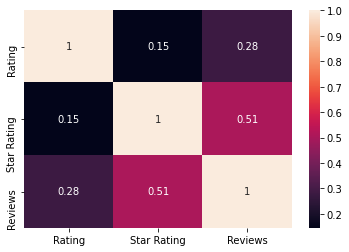

In [309]:
c = hotel_dataframe.corr()
sns.heatmap(c,annot=True)

- The heatmap reveals that there aren't very strong positive or negative correlations between our numeric features.
- There is a slight positive correlation between reviews and star rating.
- We can further investigate how the string features such as location, influence our other features at a later time.

___

__What is the distribution of the 'Star Rating' feature in our data?__

<AxesSubplot:xlabel='Star Rating'>

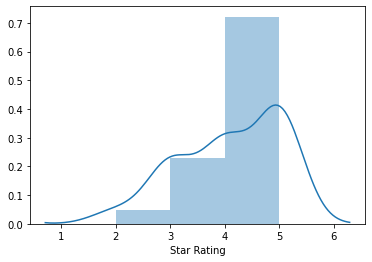

In [310]:
sns.distplot(hotel_dataframe['Star Rating'])

- As we observe, the highest number of hotels are 3 stars. Our distribution is similar to a normal distribution.

___

__What is the correlation between 'Star Rating' and 'Rating'?__

In [311]:
hotel_dataframe.groupby('Star Rating')['Rating'].mean()

Star Rating
2    8.800000
3    7.950000
4    8.111111
5    8.442308
Name: Rating, dtype: float64

- From the above table, it seems that rating stays relatively constant regardless of the star rating of the hotel. This could be influenced by the number of reviews as well. We will look into the number of reviews based on the Star Rating below.

___

__What is the correlation between 'Star Rating' and 'Reviews'?__

In [312]:
hotel_dataframe.groupby('Star Rating')['Reviews'].mean()

Star Rating
2     66.333333
3    164.428571
4    248.388889
5    434.153846
Name: Reviews, dtype: float64

- The number of reviews seems to have a positive correlation with the number of reviews. As it seems, people are more likely to leave reviews of 5 star hotels as opposed to lower rated hotels.

___

__Which locations contain the highest number of hotels?__

In [313]:
hotel_number_list = hotel_dataframe.groupby('Location').count()
hotel_number_list.sort_values('Name',ascending=False).head(10)

,Name,Rating,Star Rating,Reviews,Image,price
Location,,,,,,
Candolim,10,10,10,10,10,10
Calangute,6,6,6,6,6,6
"Baga Beach, Baga",5,5,5,5,5,5
Panaji,5,5,5,5,5,5
"Cavelossim Beach, Cavelossim",4,4,4,4,4,4
Baga,3,3,3,3,3,3
Utorda,3,3,3,3,3,3
"Miramar Beach, Panaji",3,3,3,3,3,3
"Candolim Beach, Candolim",2,2,2,2,2,2


- We have sorted out the above table in descending order ot the number of hotels in each area.
- The Candolim and Calangute areas seem to have the highest number of hotels with 14.

___

__How are these hotels Star Rating distributed across these locations?__

In [299]:
hotel_dataframe.groupby(['Location','Star Rating']).count()

Name  Rating  Reviews  Image  price
Location                     Star Rating                                     
Agonda                       2               1       1        1      1      1
                             3               1       1        1      1      1
Anjuna                       4               1       1        1      1      1
Anjuna Beach, Anjuna         3               1       1        1      1      1
Arambol beach, Arambol       3               2       2        2      2      2
                             4               1       1        1      1      1
Arpora                       5               1       1        1      1      1
Baga                         3               2       2        2      2      2
                             4               1       1        1      1      1
                             5               1       1        1      1      1
Baga Beach, Baga             2               1       1        1      1      1
                             3               2       2        2      2      2
Bambolim                     3               1       1        1      1      1
Benaulim Beach, Benaulim     3               1       1        1      1      1
                             5               1       1        1      1      1
Bogmalo                      2               1       1        1      1      1
Calangute                    2               1       1        1      1      1
                             3               3       3        3      3      3
                             4               3       3        3      3      3
                             5               2       2        2      2      2
Calangute Beach, Calangute   3               1       1        1      1      1
                             4               2       2        2      2      2
Candolim                     4               1       1        1      1      1
                             5               4       4        4      4      4
Candolim Beach, Candolim     5               2       2        2      2      2
Cansaulim                    5               1       1        1      1      1
Cavelossim Beach, Cavelossim 5               4       4        4      4      4
Colva                        4               1       1        1      1      1
Colva Beach, Colva           4               1       1        1      1      1
Dona Paula                   3               1       1        1      1      1
Majorda                      5               1       1        1      1      1
Mandrem                      4               1       1        1      1      1
Mandrem Beach , Mandrem      4               2       2        2      2      2
Miramar Beach, Panaji        5               3       3        3      3      3
Morjim Beach, Morjim         3               1       1        1      1      1
Panaji                       3               1       1        1      1      1
                             4               1       1        1      1      1
                             5               2       2        2      2      2
Utorda                       5               4       4        4      4      4
Vagator                      3               1       1        1      1      1
Vagator Beach, Vagator       5               1       1        1      1      1
Varca Beach, Varca           5               1       1        1      1      1

- The above table shows us how these hotels are distributed across the different locations.

___

__What is the highest average rating of hotels based on their location?__

In [300]:
hotel_avg_list = hotel_dataframe.groupby('Location').mean()
hotel_avg_list.sort_values('Rating',ascending=False)['Rating'].head(10)

Location
Anjuna Beach, Anjuna            10.000000
Agonda                           9.200000
Candolim Beach, Candolim         8.900000
Benaulim Beach, Benaulim         8.900000
Majorda                          8.800000
Miramar Beach, Panaji            8.733333
Colva                            8.700000
Cavelossim Beach, Cavelossim     8.700000
Vagator Beach, Vagator           8.600000
Cansaulim                        8.600000
Name: Rating, dtype: float64

- The list above shows the average rating of hotels across various locations. The rating is also based on the number of reviews so we must take that into consideration as well.

___

__What is the lowest average rating of hotels based on their location?__

In [301]:
hotel_avg_list.sort_values('Rating',ascending=False)['Rating'].tail(10)

Location
Baga                          7.8
Dona Paula                    7.7
Calangute Beach, Calangute    7.7
Mandrem                       7.7
Baga Beach, Baga              7.5
Morjim Beach, Morjim          7.5
Arpora                        7.2
Colva Beach, Colva            7.0
Vagator                       7.0
Bambolim                      6.7
Name: Rating, dtype: float64

- The above list shows the locations with the lowest average rating.

___

### 4. Conclusion

- We first imported our libraries including selenium in order to manipulate our data as well as extract it from booking.com.
- After this, we built a scraper in order to harvest this data. We specified where we wanted these hotels to be as well as the number of pages which we wanted to extract.
- Once we had our data in a DataFrame, we explored it a little bit to see if we had any missing data and to see what the data type of our features were.
- Next, we tried to ask basic questions about our data such as how one influenced the other etc.
- We were successfully able to use a scraper and get our data from booking.com and carry our basic exploration on the data using pandas, seaborn and matplotlib.

___